In [1]:
import pickle

import pandas as pd

from utils import *
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
import random
random.seed(4487)

In [2]:
with open('data.pkl', 'rb') as file:
    # 使用pickle的load方法从文件反序列化数据
        data_loaded = pickle.load(file)
# data_loaded现在是一个包含x，y，label的字典
x = data_loaded['x']
y = data_loaded['y']
label = data_loaded['label']
trainX, trainY, testX, testY = train_test_split(x, y)


# data_fake = pd.read_csv('synthetic_data.csv')
# data_fake = pd.read_csv('type_transformed_data.csv')
# data_fake = pd.read_csv('synthetic_data.csv')
# print(data_fake.shape)
# data_fake_cleaned = data_fake.dropna(axis=0, how='any')
# X = data_fake_cleaned.iloc[:, :-1]
# # 提取Y，即最后一列
# Y = data_fake_cleaned.iloc[:, -1]
# trainX, trainY, testX, testY = train_test_split(X, Y)

0.84251968503937
ROC_AUC : 0.9202898550724637


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


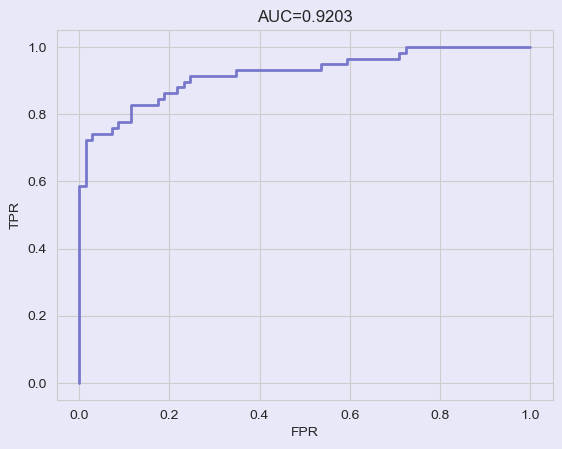

In [3]:
from sklearn.decomposition import PCA

def LR(trainX, trainY, testX):
    # Standardize the data
    scaler = StandardScaler()
    trainX_scaled = scaler.fit_transform(trainX)
    testX_scaled = scaler.transform(testX)

    # Apply PCA
    pca = PCA(n_components=11) # Choose the number of components
    trainX_pca = pca.fit_transform(trainX_scaled)
    testX_pca = pca.transform(testX_scaled)

    lr = linear_model.LogisticRegressionCV(
        Cs=logspace(-4, 4, 20), 
        cv=10, 
        max_iter=10000, 
        multi_class='multinomial', 
        scoring='accuracy',
    )
    lr.fit(trainX_pca, trainY)

    prob = lr.predict_proba(testX_pca)[:, 1]
    pred = lr.predict(testX_pca)

    return pred, prob


lr_pred, lr_prob = LR(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, lr_pred)  # 超低
print(acc)
plot_roc(testY, lr_prob)

Best K: {'n_neighbors': 7}
Best Score: 0.810677966101695
0.7874015748031497
ROC_AUC : 0.7727386306846576


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


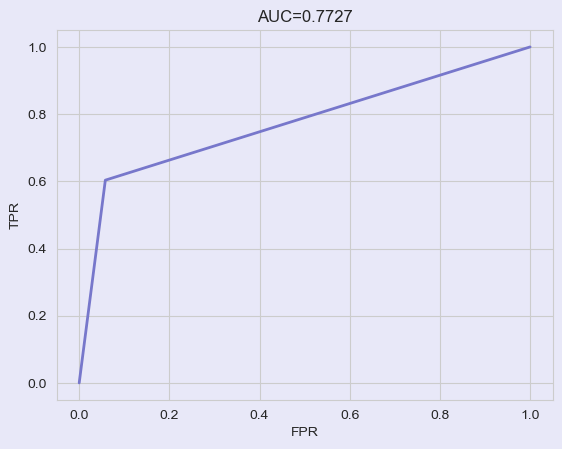

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)

# Apply PCA
pca = PCA(n_components=11) # Adjust the number of components as needed
trainX_pca = pca.fit_transform(trainX_scaled)
# 定义参数网格
param_grid = {'n_neighbors': range(1, 31)}
# 创建KNN分类器
knn = KNeighborsClassifier()

# 使用网格搜索来寻找最佳K值
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(trainX_pca, trainY)

# # 训练分类器
# knn.fit(trainX, trainY)
# 输出最佳K值和对应的分数
print("Best K:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

testX_scaled = scaler.transform(testX)
testX_pca = pca.transform(testX_scaled)
# 预测测试集
predictions = grid_search.predict(testX_pca)

# 评估分类器
acc = metrics.accuracy_score(testY, predictions)  # 超低
print(acc)
plot_roc(testY, predictions)

Accuracy: 83.46%
ROC_AUC : 0.8313343328335832


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


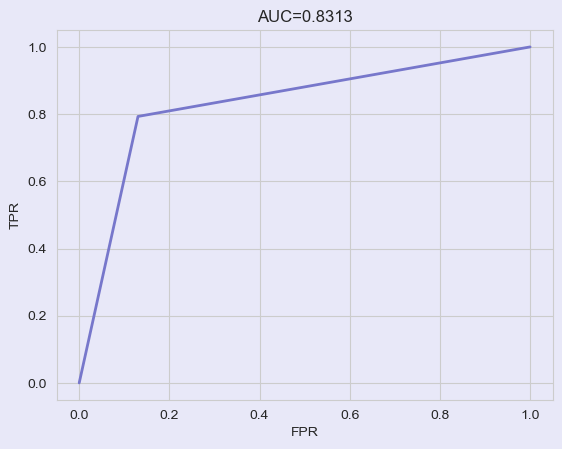

In [5]:
from sklearn.neural_network import MLPClassifier

# Standardize the data
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

# Apply PCA
pca = PCA(n_components=16) # Choose the number of components
trainX_pca = pca.fit_transform(trainX_scaled)
testX_pca = pca.transform(testX_scaled)

# Create the MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(75,50,25), 
    random_state=1,
    activation='relu', 
    solver='adam', 
    max_iter=500
)

# Train the MLP model
mlp_model.fit(trainX_pca, trainY)

# Evaluate the model
score = mlp_model.score(testX_pca, testY)
print(f"Accuracy: {score * 100:.2f}%")

predictions = mlp_model.predict(testX_pca)
plot_roc(testY, predictions)

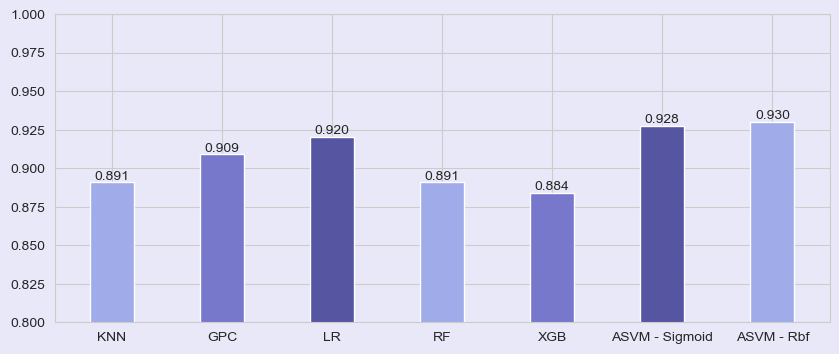

In [6]:
methods = ['KNN', 'GPC', 'LR', 'RF', 'XGB', 'ASVM - Sigmoid', 'ASVM - Rbf']
values = [0.8908, 0.9090, 0.9203, 0.8908, 0.8841, 0.9277, 0.9300]
crs = ["#a0abe9","#7777cb", "#5655a2", "#a0abe9","#7777cb", "#5655a2", "#a0abe9"]

fig = plt.figure(figsize=(10,4))
fig.patch.set_facecolor('#e8e8f8')
plt.gca().set_facecolor('#e8e8f8')
# 设置y轴的范围为0.8到1.0
plt.ylim(0.80, 1.0)

# Iterate over methods and values, creating each bar with its own color
for i, (method, value, color) in enumerate(zip(methods, values, crs)):
    plt.bar(i, value, color=color, width=0.4)
    # 在每个柱子上显示数值，保留三位小数
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    
plt.xticks(range(len(methods)), methods)
plt.show()

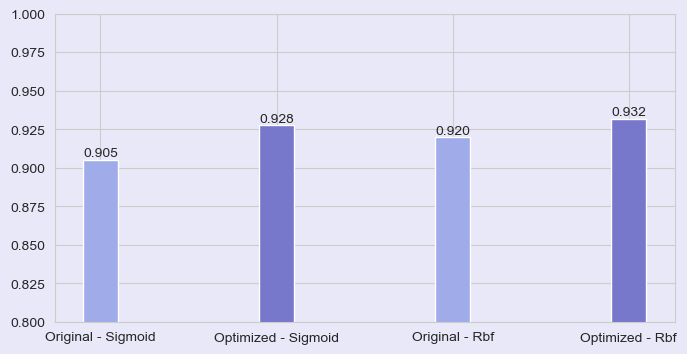

In [8]:
methods = ['Original - Sigmoid', 'Optimized - Sigmoid', 'Original - Rbf', 'Optimized - Rbf']
values = [0.9054, 0.9277, 0.9198, 0.9319]
crs = ["#a0abe9","#7777cb", "#a0abe9","#7777cb"]

fig = plt.figure(figsize=(8,4))
fig.patch.set_facecolor('#e8e8f8')
plt.gca().set_facecolor('#e8e8f8')
# 设置y轴的范围为0.8到1.0
plt.ylim(0.80, 1.0)

# Iterate over methods and values, creating each bar with its own color
for i, (method, value, color) in enumerate(zip(methods, values, crs)):
    plt.bar(i, value, color=color, width=0.2)
    # 在每个柱子上显示数值，保留三位小数
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    
plt.xticks(range(len(methods)), methods)
plt.show()